In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"



In [18]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data_complete = pd.merge(ride_data, city_data,  how="left", on=["city"])

# Display the data table for preview
data_complete.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

## Bubble Plot of Ride Sharing Data

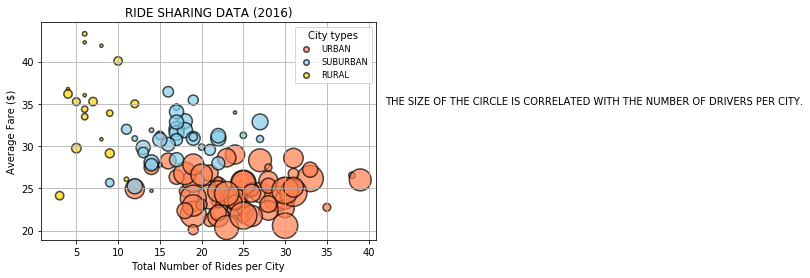

In [38]:
#
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)
#
# Obtain the x and y coordinates for each of the three city types
Urban = data_complete[data_complete["type"] == "Urban"]
Suburban = data_complete[data_complete["type"] == "Suburban"]
Rural = data_complete[data_complete["type"] == "Rural"]

Urban_rides = Urban.groupby(["city"]).count()["ride_id"]
Urban_fare_avg = Urban.groupby(["city"]).mean()["fare"]
Urban_drivers = Urban.groupby(["city"]).mean()["driver_count"]

Suburban_rides = Suburban.groupby(["city"]).count()["ride_id"]
Suburban_fare_avg = Suburban.groupby(["city"]).mean()["fare"]
Suburban_drivers = Suburban.groupby(["city"]).mean()["driver_count"]

Rural_rides = Rural.groupby(["city"]).count()["ride_id"]
Rural_fare_avg = Rural.groupby(["city"]).mean()["fare"]
Rural_drivers = Rural.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(Urban_rides, 
            Urban_fare_avg, 
            s=10*Urban_drivers, c="coral", 
            edgecolor="black", linewidths=1.5, marker="o", 
            alpha=0.7, label="URBAN")

plt.scatter(Suburban_rides, 
            Suburban_fare_avg, 
            s=10*Suburban_drivers, c="skyblue", 
            edgecolor="black", linewidths=1.5, marker="o", 
            alpha=0.7, label="SUBURBAN")

plt.scatter(Rural_rides, 
            Rural_fare_avg, 
            s=10*Rural_drivers, c="gold", 
            edgecolor="black", linewidths=1.5, marker="o", 
            alpha=0.7, label="RURAL")

# Incorporate the other graph properties
plt.title("RIDE SHARING DATA (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides per City")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "THE SIZE OF THE CIRCLE IS CORRELATED WITH THE NUMBER OF DRIVERS PER CITY.")

# Save Figure
plt.savefig("Fig_1.png")

# Show plot
plt.show()


## Total Fares by City Type

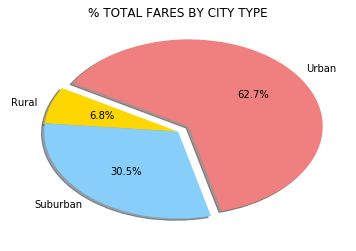

In [41]:
# Calculate Type Percents
type_percents = 100 * data_complete.groupby(["type"]).sum()["fare"] / data_complete["fare"].sum()

# Build Pie Chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% TOTAL FARES BY CITY TYPE")

# Save Figure
plt.savefig("Fig_2.png")

# Show Figure
plt.show()

## Total Rides by City Type

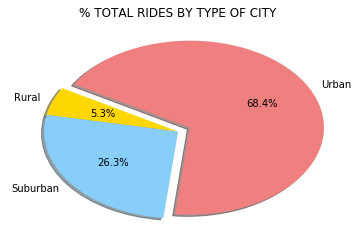

In [42]:
# Calculate Ride Percents
percent = 100 * data_complete.groupby(["type"]).count()["ride_id"] / data_complete["ride_id"].count()

# Build Pie Chart
plt.pie(percent, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% TOTAL RIDES BY TYPE OF CITY")

# Save Figure
plt.savefig("Fig_3.png")

# Show Figure
plt.show()

## Total Drivers by City Type

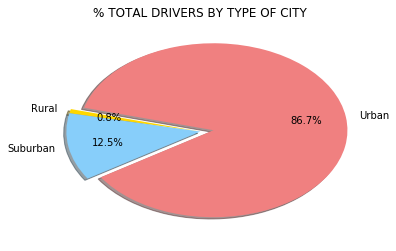

In [47]:
# Calculate Driver Percents
percent_d = 100 * data_complete.groupby(["type"]).sum()["driver_count"] / data_complete["driver_count"].sum()

# Build Pie Charts
plt.pie(percent_d, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("% TOTAL DRIVERS BY TYPE OF CITY")

# Save Figure
plt.savefig("Fig_4.png")

# Show Figure
plt.show()
